# 8 ВАРИАНТ

## Текст задания

Реализовать разбор двоичного формата данных (в духе формата WAD игры Doom или
графического формата PNG). Данные начинаются с сигнатуры 0x59 0x5a 0x53, за которой следует
структура A. Порядок байт: от младшего к старшему. Адреса указаны в виде смещений от начала
данных. В решении разрешено использовать модуль struct.

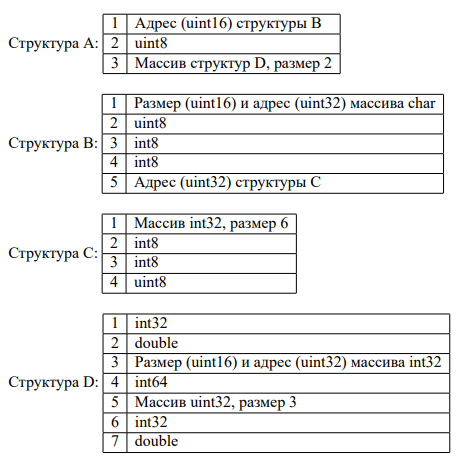

## Примеры разбора двоичного формата

In [ ]:
1.  Двоичные данные:
    
   (b'YZS\x89\x00\x9c\x05\xbe}9\x9e\xd4\xd7=5\xdc\xea?\x02\x00\x96\x00\x00\x00'
    b'\xf4Lg\xb6Z\x99\x96\x9dY8%\x8fP\xfd\xd1\xb1A\xcaw[\xc3\x82\xcc\x0e'
    b'\x10\x13\x11aF2\xcc\xbf\x13\xe9\x87\x00\xf0g`\xb8\xabp\xe2?\x02\x00\x9e\x00'
    b"\x00\x00\x9d\xfc&*\xb4AQ\xd3\xc98T\x82\x1dZ>9'\xdcE\xe9!h\xcf\xdb\xf0\xae"
    b'\xd7d\xc60\xe4\xbfudxzUd\xa3\xad\x98n\x02\x06G!j\xa2\x96A\xb9\x94\x1f\xe6'
    b'\xd3\xcd\xcd\xf4\xaa\xd3mp\xf3\x04\x00j\x00\x00\x00F\x96}n\x00'
    b'\x00\x00\xf2\xbd\xa9LvO\x8d\xa6<\x85\x12\x9bD\xf9\x13\xeb')

    Результат разбора:

   {'A1': {'B1': 'udxz',
           'B2': 70,
           'B3': -106,
           'B4': 125,
           'B5': {'C1': [-1381800875,
                         100822680,
                         -1570102969,
                         -1799798378,
                         -841751009,
                         -743770931],
                  'C2': 109,
                  'C3': 112,
                  'C4': 243}},
    'A2': 156,
    'A3': [{'D1': 964541957,
            'D2': 0.8393808563111127,
            'D3': [1286192626, -1500688522],
            'D4': -7091311948361937676,
            'D5': [2401581145, 2983329104, 1534577217],
            'D6': 248283843,
            'D7': -0.2202842687567217},
           {'D1': 8907027,
            'D2': 0.5762537575822062,
            'D3': [-1693285060, -351012540],
            'D4': -3219720016536077155,
            'D5': [2186557641, 960387613, 3913669671],
            'D6': -607164383,
            'D7': -0.630953976591142}]}

2.  Двоичные данные:
    
   (b'YZS\x8a\x00\xcfh\xcd\xf9\xae4\x1a\xd4\x9cX\x94\xe0\xbf\x02\x00'
    b'\x97\x00\x00\x00\xbfU \xfaW\xdc\xc8\xf1^\x9d.\xd20^\xb4}V$\xa8\xbe&g\x83F'
    b'\x98\xe57\x11l\x01\xc2?\xef\x8e\xba\x90\x9c>\xe7x\x1f:\xd1?\x02\x00\x9f\x00'
    b"\x00\x00\xaf\xfd$fx\xb7c\x11iz\x0ex\xee\xb7\xfd'@\xf7Gu\x12\xf2Z#\xca9"
    b"\xcb\xfe\x00p\xe6?slxxev\xdd\r\x19:\xffn!\xfc^\x1e'\xb2^\x95s\x18'\xdb\xe9-"
    b'q\xe0\x99\xf4\x94\x15\x05\x00j\x00\x00\x00]\x97\xa1o\x00\x00\x00W'
    b'\xcdp\xa6\x8dW\xcf\x92D\x8d\xa9\xea}j\xe2\xe4')

    Результат разбора:

   {'A1': {'B1': 'slxxe',
           'B2': 93,
           'B3': -105,
           'B4': -95,
           'B5': {'C1': [420339062,
                         560922426,
                         656301820,
                         351939168946,
                         -371513576,
                         -1713344211],
                  'C2': -12,
                  'C3': -108,
                  'C4': 21}},
    'A2': 207,
    'A3': [{'D1': -1359360664,
            'D2': -0.5181086600358129,
            'D3': [-1502556841, -1831905395],
            'D4': -1024326644810099265,
            'D5': [3526270302, 2108972592, 3198690390],
            'D6': 1183016742,
            'D7': 0.14066840019931415},
           {'D1': -1866821905,
            'D2': 0.26917254263842394,
            'D3': [-357987004, -454923651],
            'D4': 1253046849076788655,
            'D5': [2014214761, 670939118, 1967650624],
            'D6': 593162770,
            'D7': 0.7011723495905298}]}

## Реализация

In [ ]:
D_SIZE = 4 + 8 + 2 + 4 + 8 + 4 * 3 + 4 + 8
C_SIZE = 4 * 6 + 1 + 1 + 1
B_SIZE = 2 + 4 + 1 + 1 + 1 + 4
A_SIZE = 2 + 1


def parse_d(offset, string):
    d_bytes = string[offset:offset + D_SIZE]
    d_parsed = struct.unpack('<idHIqIIIid', d_bytes)
    d3_bytes = string[d_parsed[3]:d_parsed[3] + d_parsed[2] * 4]
    d3_parsed = struct.unpack('<' + 'i' * d_parsed[2], d3_bytes)
    return {'D1': d_parsed[0], 'D2': d_parsed[1], 'D3': list(d3_parsed), 'D4': d_parsed[4], 'D5': list(d_parsed[5:8]),
            'D6': d_parsed[8], 'D7': d_parsed[9]}


def parse_c(offset, string):
    c_bytes = string[offset:offset + C_SIZE]
    c_parsed = struct.unpack('<iiiiiibbB', c_bytes)
    return {'C1': list(c_parsed[0:6]), 'C2': c_parsed[6], 'C3': c_parsed[7], 'C4': c_parsed[8]}


def parse_b(offset, string):
    a = ''
    b_bytes = string[offset:offset + B_SIZE]
    b_parsed = struct.unpack('<HIBbbI', b_bytes)
    b0_bytes = string[b_parsed[1]:b_parsed[1] + b_parsed[0]]
    b0_parsed = struct.unpack('<' + 'c' * b_parsed[0], b0_bytes)
    for i in range(0, len(b0_parsed)):
        a = a + b0_parsed[i].decode('utf-8')
    return {'B1': a, 'B2': b_parsed[2], 'B3': b_parsed[3], 'B4': b_parsed[4], 'B5': parse_c(b_parsed[5], string)}


def parse_a(offset, string):
    a_bytes = string[offset:offset + A_SIZE]
    a_parsed = struct.unpack('<HB', a_bytes)
    return {'A1': parse_b(a_parsed[0], string), 'A2': a_parsed[1],
            'A3': [parse_d(offset + A_SIZE, string), parse_d(offset + A_SIZE + D_SIZE, string)]}


def f31(init_bytes):
    return parse_a(3, init_bytes)
